# VAR &VECM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
silver = pd.read_csv('comex.SI_210111_211224.csv', index_col=0,
                 sep=',', parse_dates=True)
gold = pd.read_csv('comex.GC_210111_211224.csv', index_col=0,
                 sep=',', parse_dates=True)
platina = pd.read_csv('NYMEX.PL_210111_211224.csv', index_col=0,
                 sep=',', parse_dates=True)
paladi = pd.read_csv('NYMEX.PA_210111_211224.csv', index_col=0,
                 sep=',', parse_dates=True)

In [3]:
paladi

,<TIME>,<OPEN>,<HIGH>,<LOW>,CLOSE,<VOL>
<DATE>,,,,,,
2021-01-11,0,2365.0,2405.0,2344.5,2380.0,1348
2021-01-12,0,2387.0,2408.0,2364.5,2391.5,966
2021-01-13,0,2392.0,2409.0,2378.5,2400.0,889
2021-01-14,0,2390.5,2428.0,2373.5,2417.0,832
2021-01-15,0,2418.0,2465.5,2376.5,2391.0,1497
...,...,...,...,...,...,...
2021-12-19,0,1773.5,1778.0,1751.0,1751.0,19
2021-12-20,0,1750.0,1756.5,1688.0,1753.0,1263
2021-12-21,0,1754.0,1830.0,1739.5,1788.0,1343


In [5]:
dat1=pd.DataFrame(gold['CLOSE'])

In [6]:
dat1['SILVER']=silver['CLOSE']
dat1['PLATINA']=platina['CLOSE']
dat1['PALADI']=paladi['CLOSE']

In [7]:
dat1

,CLOSE,SILVER,PLATINA,PALADI
<DATE>,,,,
2021-01-11,1847.6,25.140,1054.9,2380.0
2021-01-12,1859.2,25.760,1082.6,2391.5
2021-01-13,1847.9,25.380,1104.0,2400.0
2021-01-14,1846.7,25.640,1126.6,2417.0
2021-01-15,1827.7,24.830,1078.7,2391.0
...,...,...,...,...
2021-12-19,1800.7,22.360,921.8,1751.0
2021-12-20,1792.2,22.260,926.6,1753.0
2021-12-21,1791.0,22.515,928.8,1788.0


In [8]:
dat1.describe()

,CLOSE,SILVER,PLATINA,PALADI
count,298.000000,298.000000,298.000000,295.000000
mean,1796.605705,25.199272,1093.516779,2401.440000
std,47.008922,1.758784,102.063508,355.854423
min,1681.400000,21.555000,910.200000,1608.000000
25%,1768.500000,23.808750,1012.200000,2075.000000
50%,1792.400000,25.315000,1084.300000,2397.000000
75%,1825.100000,26.361250,1188.475000,2684.000000
max,1911.200000,28.825000,1318.900000,2986.500000


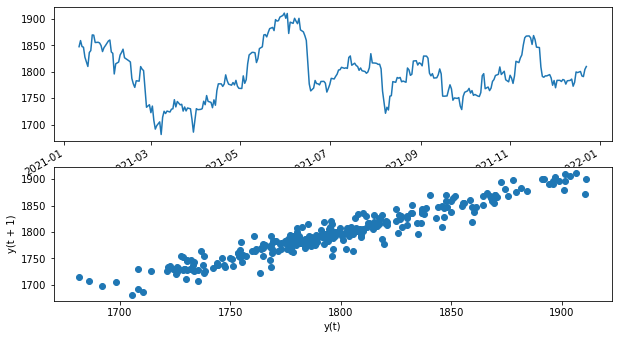

In [9]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
dat1['CLOSE'].plot(ax=ax1)
pd.plotting.lag_plot(dat1['CLOSE'])

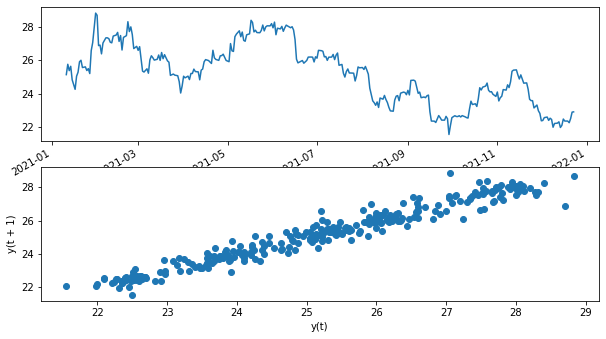

In [10]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
dat1['SILVER'].plot(ax=ax1)
pd.plotting.lag_plot(dat1['SILVER'])

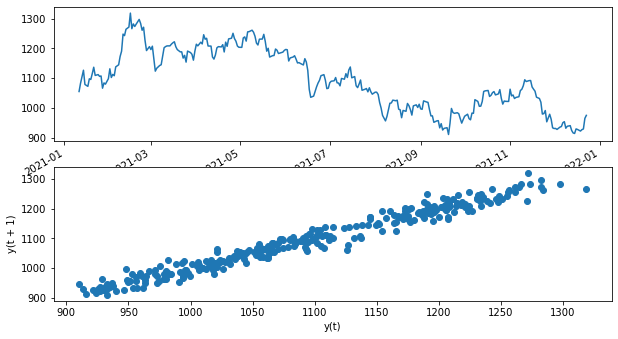

In [11]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
dat1['PLATINA'].plot(ax=ax1)
pd.plotting.lag_plot(dat1['PLATINA'])

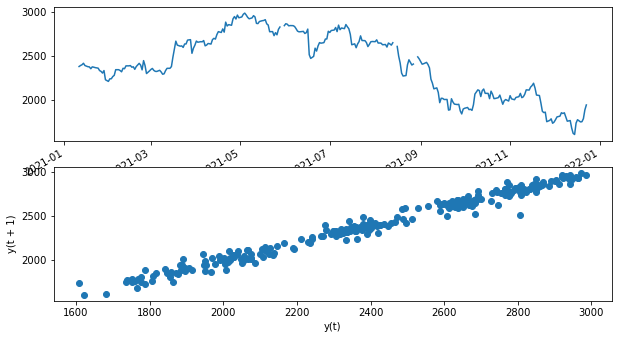

In [12]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
dat1['PALADI'].plot(ax=ax1)
pd.plotting.lag_plot(dat1['PALADI'])

In [13]:
import statsmodels.api as sm

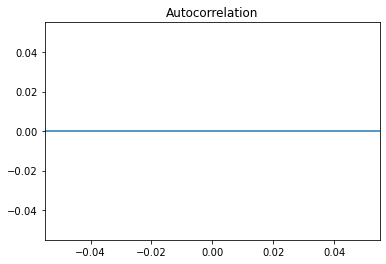

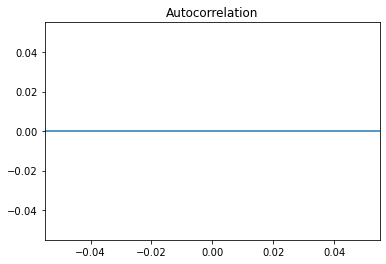

In [14]:
sm.graphics.tsa.plot_acf(dat1['PALADI'], lags = 5)

In [15]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
#import ml_metrics as metrics

In [16]:
def augmented_dickey_fuller_statistics(time_series):
      result = sm.tsa.adfuller(time_series.values)
      print('ADF Statistic: %f' % result[0])
      print('p-value: %f' % result[1])
      print('Critical Values:')   
      for key, value in result[4].items():
          print('\t%s: %.3f' % (key, value))

In [17]:
dat1[dat1.isna()]=0

In [19]:
print('Augmented Dickey-Fuller Test: Gold Price Time Series')
augmented_dickey_fuller_statistics(dat1['CLOSE'])
print('Augmented Dickey-Fuller Test: Silver Price Time Series')
augmented_dickey_fuller_statistics(dat1['SILVER'])
print('Augmented Dickey-Fuller Test: Platina Price Time Series')
augmented_dickey_fuller_statistics(dat1['PLATINA'])
print('Augmented Dickey-Fuller Test: Paladi Price Time Series')
augmented_dickey_fuller_statistics(dat1['PALADI'])

Augmented Dickey-Fuller Test: Gold Price Time Series
ADF Statistic: -2.606463
p-value: 0.091669
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Silver Price Time Series
ADF Statistic: -1.375085
p-value: 0.594161
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Platina Price Time Series
ADF Statistic: -1.403899
p-value: 0.580405
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Paladi Price Time Series
ADF Statistic: -0.456548
p-value: 0.900221
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


In [20]:
T1=10 # размер тестовой выборки
X_train, X_test=dat1[0:-T1], dat1[-T1:]

In [21]:
X_train.shape, X_test.shape

((288, 4), (10, 4))

In [22]:
X_train_diff=X_train.diff()

In [23]:
X_train_diff.describe()

,CLOSE,SILVER,PLATINA,PALADI
count,287.000000,287.000000,287.000000,287.000000
mean,-0.222300,-0.010122,-0.400348,-2.137631
std,13.637028,0.393853,19.031047,385.621925
min,-42.500000,-1.815000,-63.600000,-2828.500000
25%,-6.500000,-0.217500,-12.650000,-25.000000
50%,0.000000,-0.005000,0.900000,0.500000
75%,6.800000,0.195000,10.900000,25.250000
max,32.700000,1.765000,57.400000,2844.000000


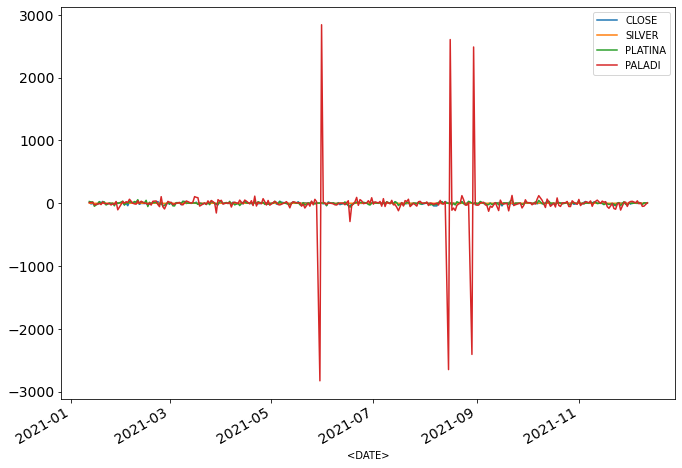

In [24]:
X_train_diff.plot(figsize=(11,8), fontsize=14)
plt.show()

In [77]:
X_train_diff.loc[(X_train_diff.PALADI < -25), 'PALADI'] = -2
X_train_diff.loc[(X_train_diff.PALADI > 25), 'PALADI'] = 2

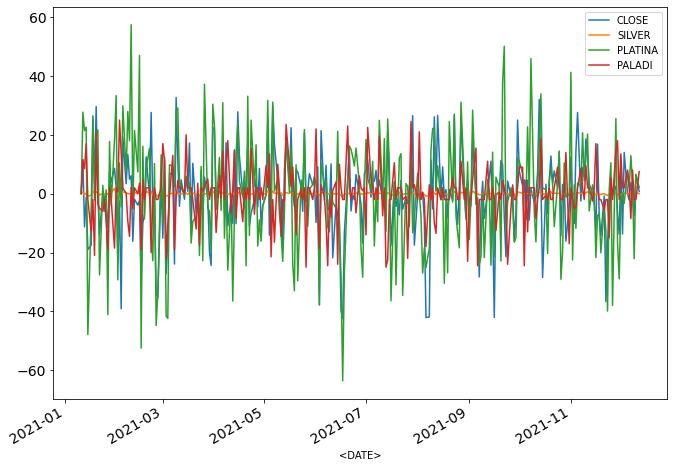

In [78]:
X_train_diff.plot(figsize=(11,8), fontsize=14)
plt.show()

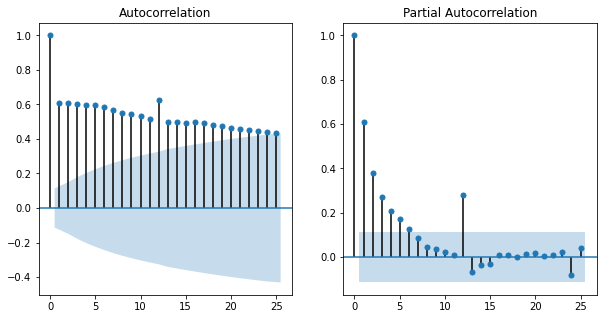

In [79]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=sm.graphics.tsa.plot_acf(dat1['PALADI'], ax=ax[0])
ax[1]=sm.graphics.tsa.plot_pacf(dat1['PALADI'], ax=ax[1])

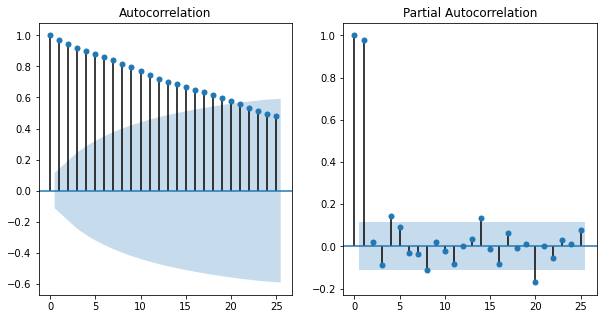

In [80]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=sm.graphics.tsa.plot_acf(dat1['SILVER'], ax=ax[0])
ax[1]=sm.graphics.tsa.plot_pacf(dat1['SILVER'], ax=ax[1])

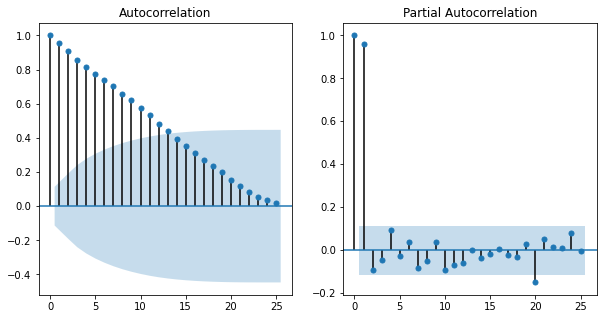

In [81]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=sm.graphics.tsa.plot_acf(dat1['CLOSE'], ax=ax[0])
ax[1]=sm.graphics.tsa.plot_pacf(dat1['CLOSE'], ax=ax[1])

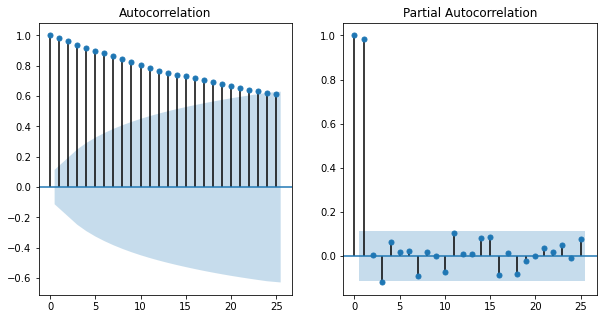

In [82]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0]=sm.graphics.tsa.plot_acf(dat1['PLATINA'], ax=ax[0])
ax[1]=sm.graphics.tsa.plot_pacf(dat1['PLATINA'], ax=ax[1])

In [83]:
import statsmodels.tsa as ts1

In [84]:
X_train_diff[X_train_diff.isna()]=0

In [85]:
print(ts1.stattools.grangercausalitytests(X_train_diff[['CLOSE','SILVER']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['CLOSE','PLATINA']], maxlag=15 , addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['CLOSE','PALADI']], maxlag=15, addconst=True, verbose=True))
print(ts1.stattools.grangercausalitytests(X_train_diff[['SILVER','PALADI']], maxlag=15, addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['SILVER','PLATINA']], maxlag=15 , addconst=True, verbose=True)) 
print(ts1.stattools.grangercausalitytests(X_train_diff[['PLATINA','PALADI']], maxlag=15, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0369  , p=0.0256  , df_denom=284, df_num=1
ssr based chi2 test:   chi2=5.0901  , p=0.0241  , df=1
likelihood ratio test: chi2=5.0455  , p=0.0247  , df=1
parameter F test:         F=5.0369  , p=0.0256  , df_denom=284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8866  , p=0.0574  , df_denom=281, df_num=2
ssr based chi2 test:   chi2=5.8758  , p=0.0530  , df=2
likelihood ratio test: chi2=5.8163  , p=0.0546  , df=2
parameter F test:         F=2.8866  , p=0.0574  , df_denom=281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1683  , p=0.0920  , df_denom=278, df_num=3
ssr based chi2 test:   chi2=6.6687  , p=0.0832  , df=3
likelihood ratio test: chi2=6.5918  , p=0.0861  , df=3
parameter F test:         F=2.1683  , p=0.0920  , df_denom=278, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9730  , p=0.0038  

parameter F test:         F=1.0284  , p=0.3929  , df_denom=275, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8910  , p=0.4875  , df_denom=272, df_num=5
ssr based chi2 test:   chi2=4.6350  , p=0.4620  , df=5
likelihood ratio test: chi2=4.5975  , p=0.4669  , df=5
parameter F test:         F=0.8910  , p=0.4875  , df_denom=272, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9650  , p=0.4493  , df_denom=269, df_num=6
ssr based chi2 test:   chi2=6.0701  , p=0.4154  , df=6
likelihood ratio test: chi2=6.0057  , p=0.4226  , df=6
parameter F test:         F=0.9650  , p=0.4493  , df_denom=269, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.9692  , p=0.4541  , df_denom=266, df_num=7
ssr based chi2 test:   chi2=7.1671  , p=0.4117  , df=7
likelihood ratio test: chi2=7.0773  , p=0.4209  , df=7
parameter F test:         F=0.9692  , p=0.4541  , df_denom=266, df_num=7

Granger Causality
nu

ssr based F test:         F=0.9150  , p=0.4952  , df_denom=266, df_num=7
ssr based chi2 test:   chi2=6.7659  , p=0.4537  , df=7
likelihood ratio test: chi2=6.6857  , p=0.4623  , df=7
parameter F test:         F=0.9150  , p=0.4952  , df_denom=266, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.9874  , p=0.4461  , df_denom=263, df_num=8
ssr based chi2 test:   chi2=8.4102  , p=0.3945  , df=8
likelihood ratio test: chi2=8.2864  , p=0.4060  , df=8
parameter F test:         F=0.9874  , p=0.4461  , df_denom=263, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.8184  , p=0.5997  , df_denom=260, df_num=9
ssr based chi2 test:   chi2=7.9036  , p=0.5439  , df=9
likelihood ratio test: chi2=7.7937  , p=0.5551  , df=9
parameter F test:         F=0.8184  , p=0.5997  , df_denom=260, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.7713  , p=0.6564  , df_denom=257, df_num=10
ssr based chi2 test

parameter F test:         F=0.8940  , p=0.5660  , df_denom=245, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.8770  , p=0.5907  , df_denom=242, df_num=15
ssr based chi2 test:   chi2=14.8402 , p=0.4630  , df=15
likelihood ratio test: chi2=14.4509 , p=0.4916  , df=15
parameter F test:         F=0.8770  , p=0.5907  , df_denom=242, df_num=15
{1: ({'ssr_ftest': (1.7634554832805833, 0.1852603732093718, 284.0, 1), 'ssr_chi2test': (1.7820835341603078, 0.1818936884479689, 1), 'lrtest': (1.7765735409246872, 0.18257063939261647, 1), 'params_ftest': (1.763455483280662, 0.18526037320935654, 284.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f99020b89a0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f99020b8d90>, array([[0., 1., 0.]])]), 2: ({'ssr_ftest': (0.8979023896461988, 0.4085890425274601, 281.0, 2), 'ssr_chi2test': (1.827758600987992, 0.40096573648771955, 2), 'lrtest': (1.821942978109

parameter F test:         F=1.6064  , p=0.1729  , df_denom=275, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1540  , p=0.3323  , df_denom=272, df_num=5
ssr based chi2 test:   chi2=6.0031  , p=0.3059  , df=5
likelihood ratio test: chi2=5.9404  , p=0.3121  , df=5
parameter F test:         F=1.1540  , p=0.3323  , df_denom=272, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.0166  , p=0.4147  , df_denom=269, df_num=6
ssr based chi2 test:   chi2=6.3944  , p=0.3805  , df=6
likelihood ratio test: chi2=6.3230  , p=0.3880  , df=6
parameter F test:         F=1.0166  , p=0.4147  , df_denom=269, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.8190  , p=0.5722  , df_denom=266, df_num=7
ssr based chi2 test:   chi2=6.0560  , p=0.5332  , df=7
likelihood ratio test: chi2=5.9917  , p=0.5407  , df=7
parameter F test:         F=0.8190  , p=0.5722  , df_denom=266, df_num=7

Granger Causality
nu

y1_t=c1+A11*Y_(t-1)+A21*Y_(t-2)+A31*Y_(t-3)+eps
y2_t=c2+A12*Y_(t-1)+A22*Y_(t-2)+A32*Y_(t-3)+eps
y3_t=c3+A13*Y_(t-1)+A23*Y_(t-2)+A33*Y_(t-3)+eps


In [86]:
from statsmodels.tsa.api import VAR

In [87]:
model =VAR(endog=X_train_diff)
res=model.select_order(15)
res.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,12.33*,12.38*,2.261e+05*,12.35*
1,12.38,12.65,2.389e+05,12.49
2,12.42,12.90,2.480e+05,12.61
3,12.44,13.12,2.517e+05,12.71
4,12.47,13.37,2.607e+05,12.83
5,12.53,13.64,2.761e+05,12.97
6,12.57,13.89,2.873e+05,13.10
7,12.62,14.15,3.033e+05,13.23
8,12.66,14.41,3.170e+05,13.36
9,12.70,14.65,3.285e+05,13.48


In [88]:
model_fit=model.fit(maxlags=4)

In [89]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Apr, 2022
Time:                     23:39:46
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    13.3619
Nobs:                     284.000    HQIC:                   12.8385
Log likelihood:          -3317.24    FPE:                    265351.
AIC:                      12.4882    Det(Omega_mle):         210295.
--------------------------------------------------------------------
Results for equation CLOSE
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.337967         0.796829           -0.424           0.671
L1.CLOSE           0.211340         0.090178            2.344           0.019
L1.SILVER         -5.477816         3.300417           -1.660           

In [90]:
lag_order = model_fit.k_ar 
print(lag_order)

4


In [91]:
input_data = X_train_diff.values[-lag_order:] 
print(input_data)

[[-1.20e+00 -7.50e-02  3.40e+00  8.00e+00]
 [-7.50e+00 -4.65e-01 -2.21e+01 -2.00e+00]
 [ 6.30e+00  2.25e-01  6.60e+00 -2.00e+00]
 [ 7.00e-01  2.00e-02  2.10e+00  7.50e+00]]


In [92]:
pred = model_fit.forecast(y=input_data, steps=T1) 
pred= (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')) 
print(pred)

            CLOSE_pred  SILVER_pred  PLATINA_pred  PALADI_pred
<DATE>                                                        
2021-12-13    3.396450     0.086711      1.799122    -1.533090
2021-12-14    0.090879     0.007264      1.484690    -0.567196
2021-12-15   -0.821111    -0.070358     -3.756343    -0.557017
2021-12-16    0.302617    -0.004034     -0.104992    -0.886176
2021-12-17   -0.732834    -0.022334     -1.257304     0.326668
2021-12-19    0.019861    -0.001059     -0.575441    -0.299611
2021-12-20   -0.091278    -0.005902     -0.200802    -0.315514
2021-12-21   -0.117388    -0.011762     -0.767243    -0.289551
2021-12-22   -0.172690    -0.011639     -0.535738    -0.422877
2021-12-23   -0.287814    -0.013817     -0.711698    -0.310066


In [93]:
# inverting transformation
def invert_transformation(X_train, pred_df):
        forecast = pred_df.copy()
        columns = X_train.columns
        for col in columns:
              forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col) +'_pred'].cumsum()
        return forecast

    

In [94]:
output=invert_transformation(X_train,pred)

In [95]:
output

,CLOSE_pred,SILVER_pred,PLATINA_pred,PALADI_pred
<DATE>,,,,
2021-12-13,1787.196450,22.321711,941.799122,1764.966910
2021-12-14,1787.287329,22.328975,943.283812,1764.399714
2021-12-15,1786.466218,22.258617,939.527469,1763.842697
2021-12-16,1786.768835,22.254583,939.422476,1762.956521
2021-12-17,1786.036002,22.232249,938.165172,1763.283189
2021-12-19,1786.055862,22.231190,937.589731,1762.983579
2021-12-20,1785.964585,22.225288,937.388929,1762.668064
2021-12-21,1785.847197,22.213526,936.621686,1762.378513
2021-12-22,1785.674507,22.201887,936.085947,1761.955635


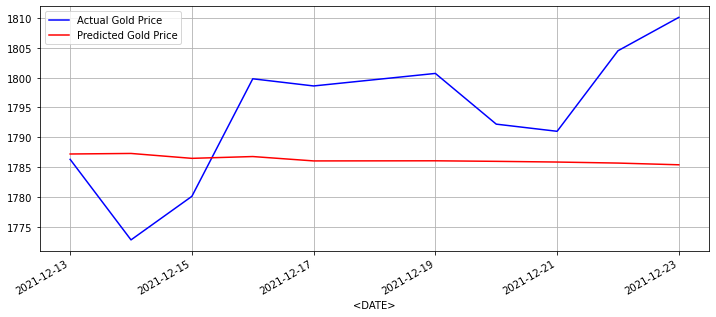

In [96]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test.CLOSE.plot(color='blue', grid=True, label='Actual Gold Price')
ax2=output.CLOSE_pred.plot(color='red', grid=True, label='Predicted Gold Price')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

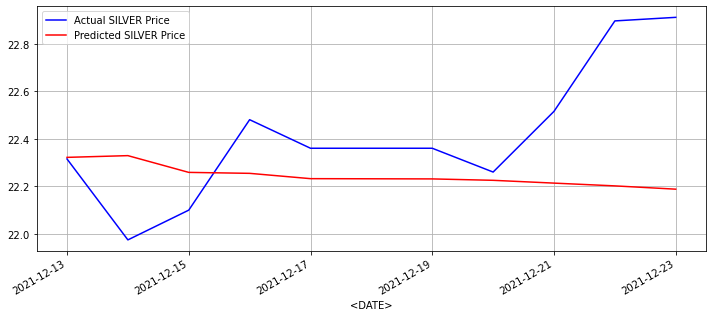

In [97]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test.SILVER.plot(color='blue', grid=True, label='Actual SILVER Price')
ax2=output.SILVER_pred.plot(color='red', grid=True, label='Predicted SILVER Price')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()


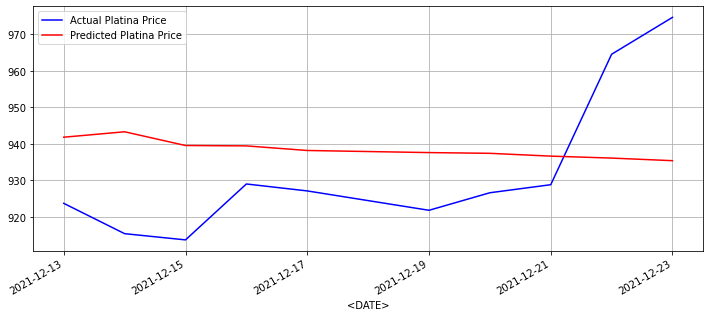

In [98]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test.PLATINA.plot(color='blue', grid=True, label='Actual Platina Price')
ax2=output.PLATINA_pred.plot(color='red', grid=True, label='Predicted Platina Price')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

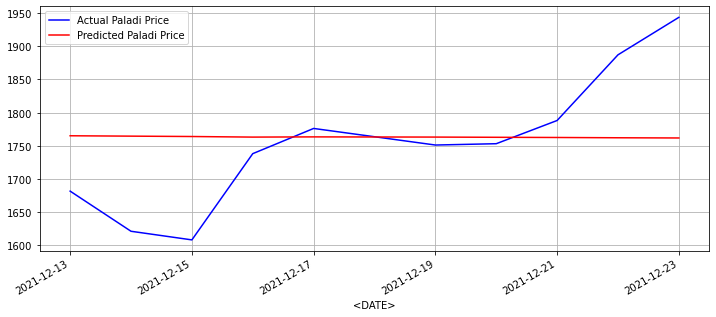

In [99]:
plt.figure(figsize=(12,5))
plt.xlabel('DATE')

ax1=X_test.PALADI.plot(color='blue', grid=True, label='Actual Paladi Price')
ax2=output.PALADI_pred.plot(color='red', grid=True, label='Predicted Paladi Price')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()